In [7]:
import pygmt
import pandas as pd
import numpy as np

In [8]:

uu=pd.read_csv('mixratio.out', sep=',')
df_uu = pd.DataFrame(uu)
print(df_uu)

     stnm       lon      lat    elev     stan     Rsoil     Rtemp
0     BGU -113.0300  40.9210  1640.0    \tBGU -0.000111  0.999889
1    BRPU -110.7400  39.4730  1687.0   \tBRPU -0.960306  0.039694
2    BSUT -110.7610  40.5360  3211.0   \tBSUT -0.037412  0.962588
3     CTU -111.7500  40.6930  1731.0    \tCTU -0.403740  0.596260
4    CVRU -111.1720  38.9180  1912.0   \tCVRU -0.629244  0.370756
5     DUG -112.8133  40.1950  1477.0    \tDUG -0.635465  0.364535
6    FOR1 -113.0940  38.3690  1642.0   \tFOR1 -0.288186  0.711814
7    FORU -112.8610  38.4590  1840.0   \tFORU -0.560175  0.439825
8     HMU -110.7420  37.9380  2430.0    \tHMU -0.000124  0.999876
9    HVU1 -112.7750  41.7800  1609.0   \tHVU1 -0.243046  0.756954
10   HVU2 -112.7750  41.7800  1609.0   \tHVU2 -0.000428  0.999572
11   HWUT -111.5652  41.6069  1830.0   \tHWUT -0.986818  0.013182
12    JLU -111.4500  40.6020  2285.0    \tJLU -0.500000  0.500000
13   LCMT -113.2440  37.0120  1411.0   \tLCMT -0.000107  0.999893
14   LIUT 

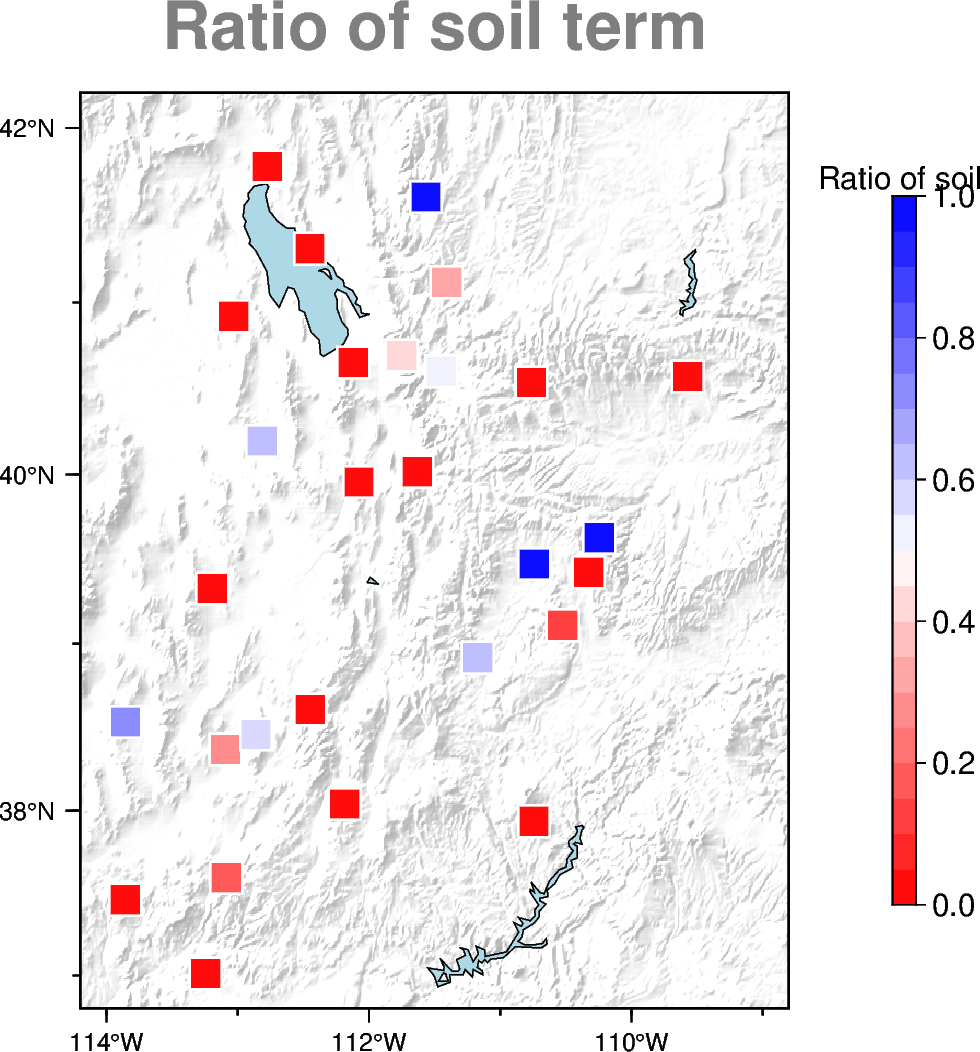

In [13]:
# create df with station information
region=[-114.2,-108.8,36.8,42.2]
proj="M6c"

# --- Rsoil
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="16p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid=grid, projection=proj, cmap="grey",shading=True,transparency=50,frame=["af", "+tRatio of soil term"])
fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)

pygmt.makecpt(cmap='polar',  series=[0,1,0.05], reverse=True)
# seismic stations
fig.plot(x = df_uu.lon, y = df_uu.lat, fill=np.abs(df_uu.Rsoil), cmap=True , style = "s0.15i", pen = "0.5p,255")
#fig.text(text="Ratio of soil term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='12p')
fig.colorbar( cmap=True,    position="JRM+w6c/0.2c",     frame=["a", "y+lRatio of soil "],)


fig.show()


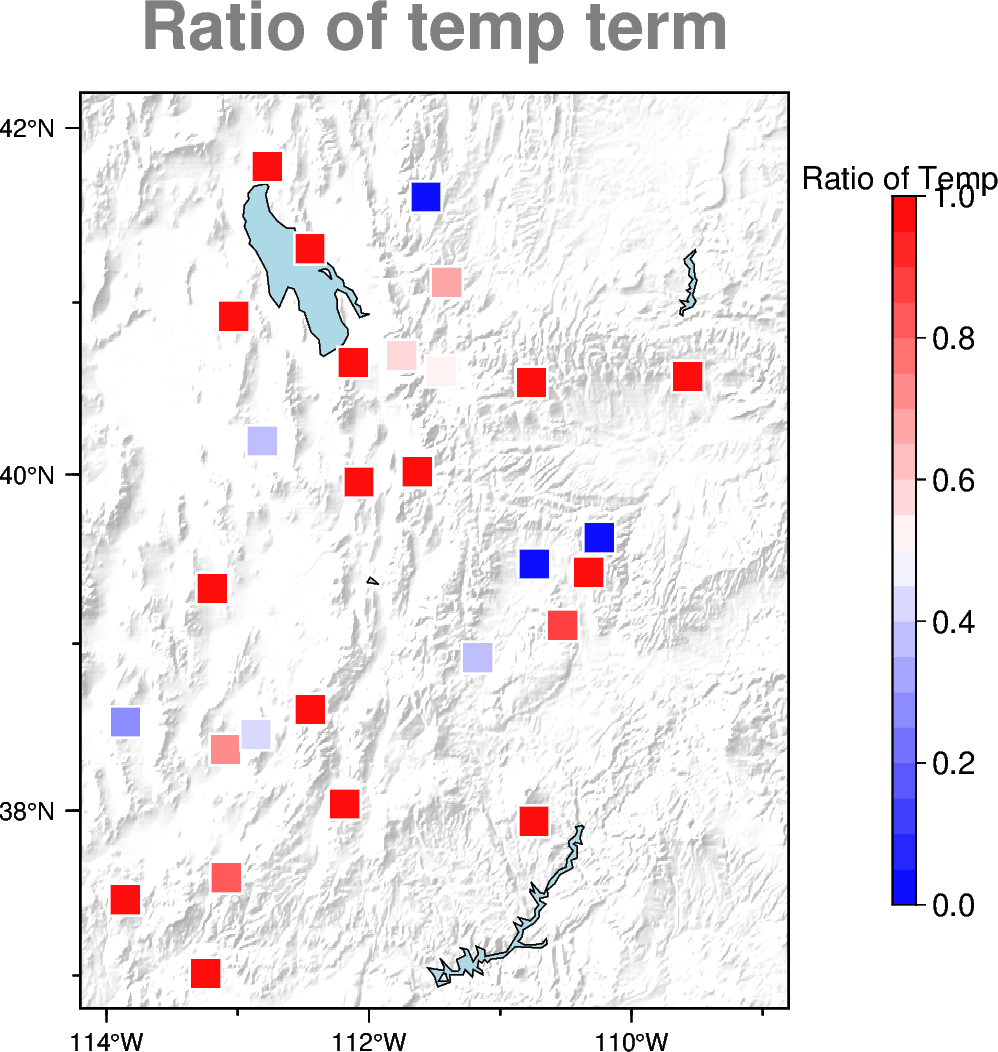

In [15]:


fig.shift_origin(xshift="8c")
# --- Rtemp
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="16p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(grid=grid, projection=proj, cmap="grey",shading=True,transparency=50,frame=["af", "+tRatio of temp term"])

fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)
pygmt.makecpt(cmap='polar', continuous=True, series=[0,1.0,0.2])

pygmt.makecpt(cmap='polar',  series=[0,1,0.05])
# seismic stations
fig.plot(x = df_uu.lon, y = df_uu.lat, fill=np.abs(df_uu.Rtemp), cmap=True, style = "s0.15i", pen = "0.5p,255")
#fig.text(text="Ratio of temp term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='12p')

fig.colorbar( cmap=True,    position="JRM+w6c/0.2c",     frame=["a", "y+lRatio of Temp "],)


fig.show()